In [146]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from matplotlib import pyplot as plt

# 导入数据

In [147]:
trans = transforms.ToTensor()
train_data = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
test_data = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

In [148]:
sequence_length = 28
# 序列长度
input_size = 28
# 每个序列的输入数
hidden_size = 128
num_classes = 10
batch_size = 100
num_epochs = 10
learning_rate = 0.01

In [149]:
train_iter = data.DataLoader(train_data, batch_size, shuffle=True,
                             num_workers=4)
test_iter = data.DataLoader(test_data, batch_size, shuffle=True,
                            num_workers=4)

In [150]:
for X, y in train_iter:
    print(X.shape)
    break

torch.Size([100, 1, 28, 28])


In [151]:
def get_label(i):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return text_labels[i]

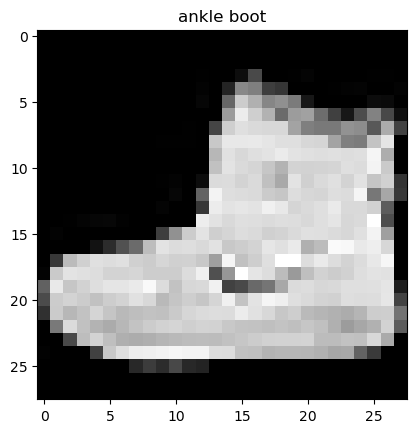

In [152]:
plt.imshow(train_data.data[0], cmap='gray')
plt.title(get_label(train_data.targets[0]))
plt.show()

In [153]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [154]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

In [155]:
loss_func = cross_entropy

In [156]:
from torch import nn

In [157]:
 class my_rnn(nn.Module):
        def __init__(self,input_size, hidden_size, batch_size, num_outputs):
            super(my_rnn,self).__init__()
            self.hidden_size = hidden_size
            self.U = nn.Linear(input_size, hidden_size)
            self.W = nn.Linear(hidden_size, hidden_size)
            self.V = nn.Linear(hidden_size, num_outputs)
        def forward(self,X):
            X = X.reshape(-1, X.size(2),X.size(3))
            sequence_len = X.size(1)
            A = torch.rand(X.size(0), self.hidden_size)
            for i in range(sequence_len):
                input1 = X[:, i, :]
                input1 = self.U(input1)
                input2 = self.W(A)
                A = torch.relu(input1 + input2)
            return softmax(self.V(A))
                

In [158]:
net = my_rnn(input_size, hidden_size, batch_size, num_classes)

In [159]:
from torch import optim
optimizer = optim.Adam(net.parameters(), lr = 0.01)   

In [160]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [161]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [162]:
import numpy as np


def train(num_epoch, model, data_iter):
    Accuracy=[]
    for epoch in range(num_epoch+1):
        for i, (X,y) in enumerate(data_iter):
            metric = Accumulator(2)
            y_hat = model(X)
            loss = loss_func(y_hat,y)
            metric.add(accuracy(y_hat,y), batch_size)
            
            optimizer.zero_grad()
            loss.mean().backward()
            optimizer.step()
            
        Accuracy.append(metric[0]/metric[1])
    
    plt.plot(list(range(num_epoch+1)),Accuracy,label='accuracy')
    plt.xlabel = 'epoch'
    plt.legend()

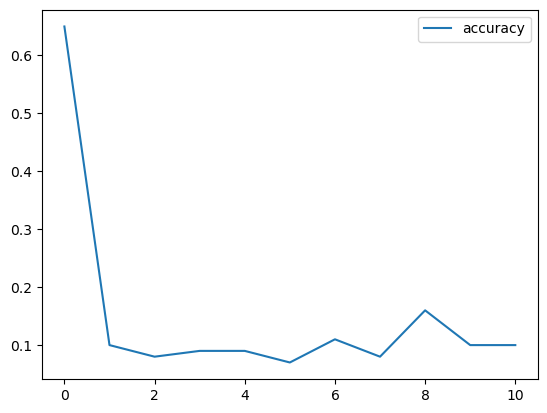

In [163]:
train(10, net, train_iter)

In [164]:
# Test the model
net.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X, y in test_iter:
        outputs = net(X)
        _, predicted = torch.max(outputs.data, 1)
        total = total + y.size(0)
        correct = correct + (predicted == y).sum().item()
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 10.0 %
